In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score 
from sklearn.preprocessing import StandardScaler  
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 


In [7]:
data = pd.read_csv("USA_Housing.csv")
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


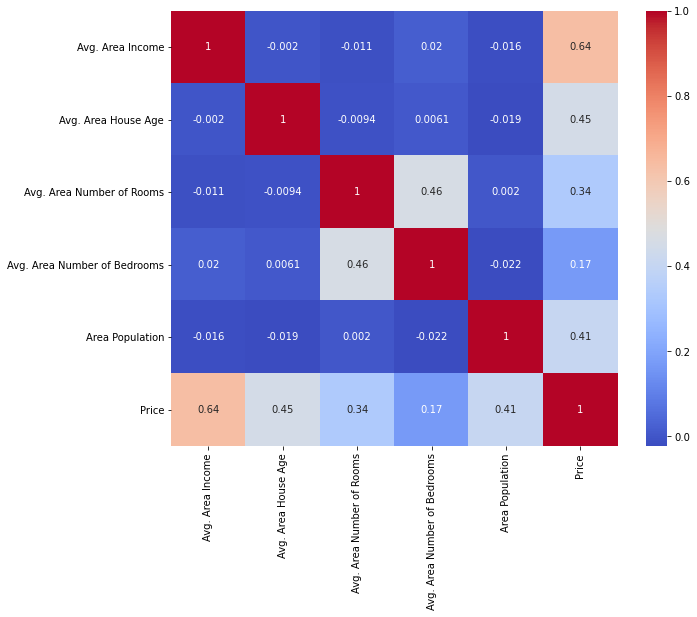

In [8]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

In [9]:
x = data.drop(["Price","Address"],axis=1)
y = data["Price"]

In [10]:
print(x)

      Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0         79545.458574             5.682861                   7.009188   
1         79248.642455             6.002900                   6.730821   
2         61287.067179             5.865890                   8.512727   
3         63345.240046             7.188236                   5.586729   
4         59982.197226             5.040555                   7.839388   
...                ...                  ...                        ...   
4995      60567.944140             7.830362                   6.137356   
4996      78491.275435             6.999135                   6.576763   
4997      63390.686886             7.250591                   4.805081   
4998      68001.331235             5.534388                   7.130144   
4999      65510.581804             5.992305                   6.792336   

      Avg. Area Number of Bedrooms  Area Population  
0                             4.09     23086.800503  
1  

In [11]:
scale = StandardScaler()
cols = x.columns
x = scale.fit_transform(x)

In [12]:
print(x)

[[ 1.02865969 -0.29692705  0.02127433  0.08806222 -1.31759867]
 [ 1.00080775  0.02590164 -0.25550611 -0.72230146  0.40399945]
 [-0.68462916 -0.11230283  1.5162435   0.93084045  0.07240989]
 ...
 [-0.48723454  1.28447022 -2.17026949 -1.50025059 -0.29193658]
 [-0.05459152 -0.44669439  0.14154061  1.18205319  0.65111608]
 [-0.28831272  0.01521477 -0.19434166  0.07185495  1.04162464]]


In [13]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3 ,random_state=101)

In [14]:
model = LinearRegression()

In [15]:
model.fit(x_train,y_train)

LinearRegression()

In [16]:
pred = model.predict(x_test)

In [17]:
score = r2_score(y_test,pred)
print(f" Le score après entraînement de ce modèle est: {score} ")

 Le score après entraînement de ce modèle est: 0.9185060945363621 


<AxesSubplot:xlabel='Price'>

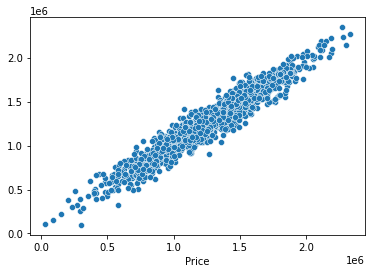

In [18]:
sns.scatterplot(x=y_test,y=pred)

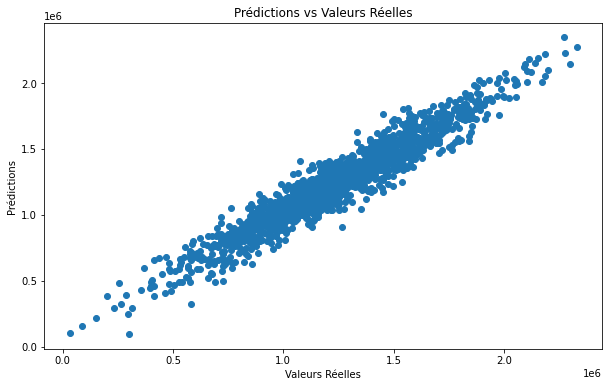

In [22]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, pred)
plt.xlabel('Valeurs Réelles')
plt.ylabel('Prédictions')
plt.title('Prédictions vs Valeurs Réelles')
plt.show()

In [19]:
var=y_test-pred

<AxesSubplot:xlabel='Price', ylabel='Count'>

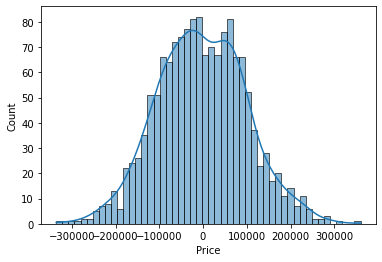

In [20]:
sns.histplot(var,bins=50,kde=True)

In [21]:
cdf=pd.DataFrame(model.coef_,cols, ['coefficients']).sort_values("coefficients",ascending=False)
cdf

,coefficients
Avg. Area Income,230377.522562
Avg. Area House Age,163793.118566
Area Population,151104.850817
Avg. Area Number of Rooms,122101.350269
Avg. Area Number of Bedrooms,1627.317237
